This notebook is copyright 2024 Jens Scheidtmann. 
It is licensed under a BSD 3-clause license, see file LICENSE in this folder.

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/jscheidtmann/guiding-pynb/HEAD?labpath=Guiding.ipynb)

In [15]:
# Install prerequisites

import sys
!{sys.executable} -m pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip


In [16]:
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import numpy as np

plt.rcParams["figure.figsize"] = (16,9)

D = np.arange(20.,1100.,step=2.)


# Resolution of a telescope

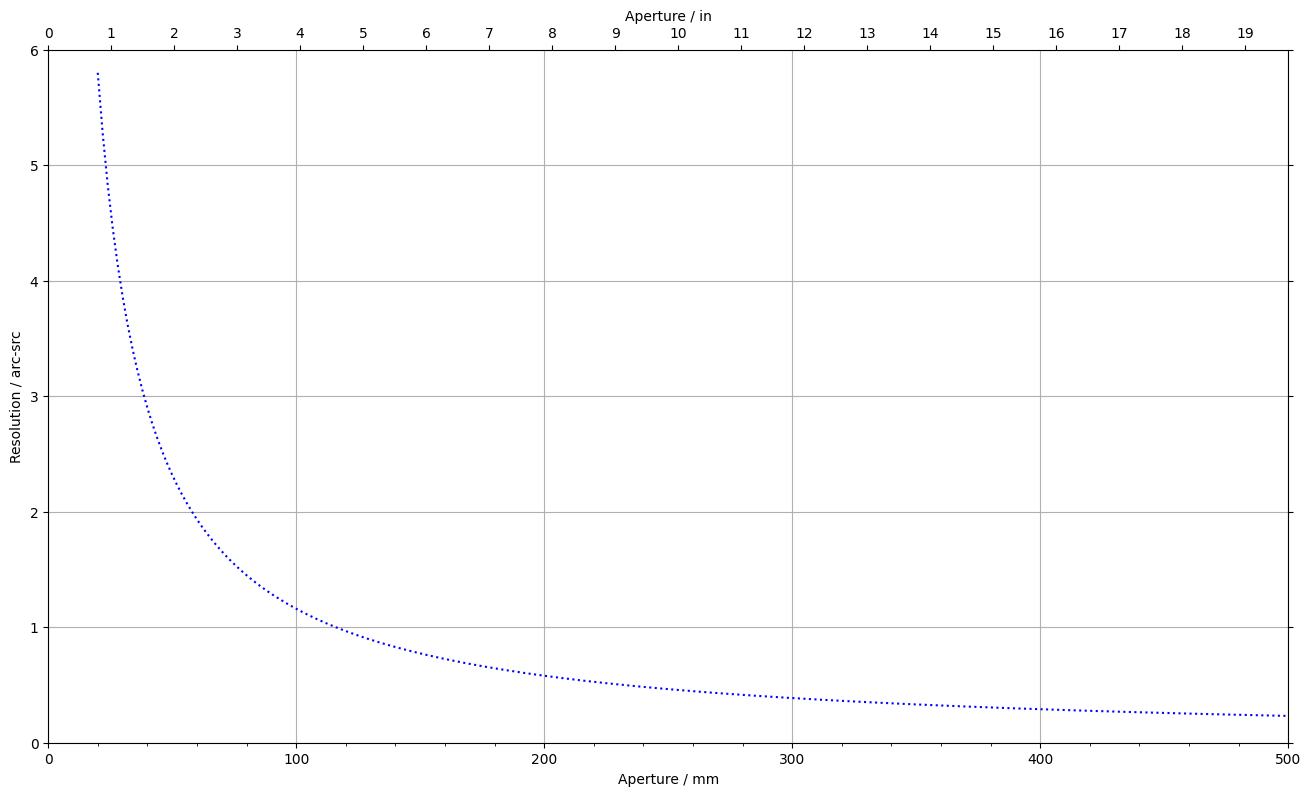

In [17]:
from mpl_toolkits.axes_grid1 import host_subplot

ax = host_subplot(111)
ax.plot(D, 116./D, 'b:')
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.grid(True)

ax2 = ax.twin()  # ax2 is responsible for "top" axis and "right" axis
ax2.set_xticks(np.arange(0., 1050,25.4),
               labels=[x for x in range(42)])
ax2.set_xlabel("Aperture / in")

ax2.axis["right"].major_ticklabels.set_visible(False)
ax2.axis["top"].major_ticklabels.set_visible(True)

ax.set_xlim((0.,500.))
ax.set_ylim((0., 6.))
plt.xlabel("Aperture / mm")
plt.ylabel("Resolution / arc-src")
plt.savefig("dawes_limit.svg", transparent=True)
plt.show()

# Resolution and Seeing

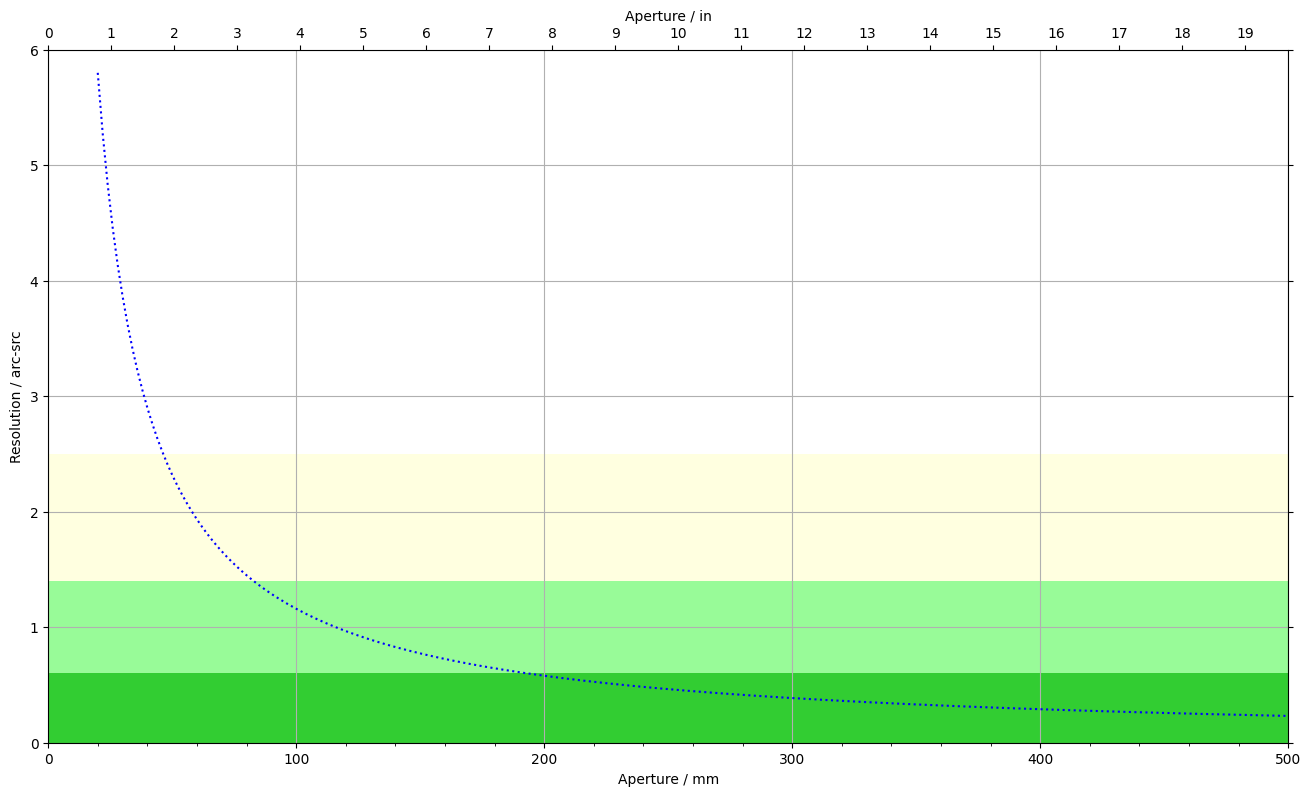

In [18]:
from matplotlib import patches
from matplotlib.ticker import AutoMinorLocator

ax = host_subplot(111)
ax.plot(D, 116./D, 'b:')
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.grid(True)

l_exc = 0.6
l_super = 1.4
l_ok = 2.5

seeing_excellent = patches.Rectangle((0, 0), 1050, l_exc, facecolor="limegreen")
seeing_good = patches.Rectangle((0, l_exc), 1050, l_super - l_exc, facecolor="palegreen")
seeing_ok = patches.Rectangle((0, l_super), 1050, l_ok - l_super, facecolor="lightyellow")
ax.add_patch(seeing_excellent)
ax.add_patch(seeing_good)
ax.add_patch(seeing_ok)

ax2 = ax.twin()  # ax2 is responsible for "top" axis and "right" axis
ax2.set_xticks(np.arange(0., 1050,25.4),
               labels=[x for x in range(42)])
ax2.set_xlabel("Aperture / in")

ax2.axis["right"].major_ticklabels.set_visible(False)
ax2.axis["top"].major_ticklabels.set_visible(True)

ax.set_xlim((0.,500.))
ax.set_ylim((0.,6.))
plt.xlabel("Aperture / mm")
plt.ylabel("Resolution / arc-src")
plt.savefig("seeing.svg", transparent=True)
plt.show()